In [21]:
# Read libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import matplotlib

In [29]:
sns.__version__

'0.11.0'

In [12]:
#Import data
df_calendar_seattle = pd.read_csv('data/calendar_seattle.csv')
df_listings_seattle = pd.read_csv('data/listings_seattle.csv')
df_reviews_seattle = pd.read_csv('data/reviews_seattle.csv')

df_calendar_boston = pd.read_csv('data/calendar_boston.csv')
df_listings_boston = pd.read_csv('data/listings_boston.csv')
df_reviews_boston = pd.read_csv('data/reviews_boston.csv')

### Q1: # Which city shows the most days available per place listed in the year?

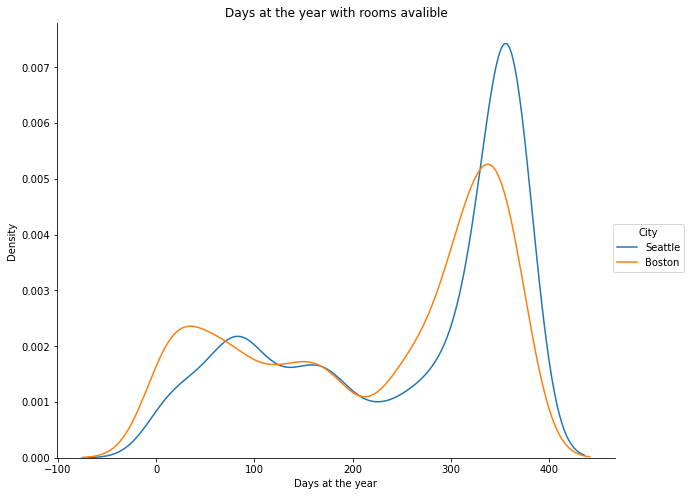

In [13]:
# Which city shows the most days available per place listed in the year?

#flag availability in the calendar
df_calendar_seattle['flg_reserved_day'] = df_calendar_seattle.available.replace({'t':0,'f':1})
df_calendar_boston['flg_reserved_day'] = df_calendar_boston.available.replace({'t':0,'f':1})

#filter calendar by days with not reservation
df_availability_seattle = pd.DataFrame(df_calendar_seattle[df_calendar_seattle.flg_reserved_day == 0].listing_id.value_counts())
df_availability_boston = pd.DataFrame(df_calendar_boston[df_calendar_boston.flg_reserved_day == 0].listing_id.value_counts())

#plot
fig, axs = plt.subplots(1,1,figsize = (10,8))

sns.kdeplot(df_availability_seattle.listing_id)
sns.kdeplot(df_availability_boston.listing_id)
fig.legend(title='City',loc='right', labels=['Seattle', 'Boston'])
axs.set_title('Days at the year with rooms avalible')
axs.set_xlabel('Days at the year')
sns.despine()

### Q2: # Which property type is the most and less reserved at the year by city?

In [14]:
#Transform type price to numeric
df_listings_seattle['price'] = pd.to_numeric(df_listings_seattle['price'].str[1:].str.replace(',',''))
df_listings_boston['price'] = pd.to_numeric(df_listings_boston['price'].str[1:].str.replace(',',''))

#Sum reserved days by listing place 
df_calendar_boston_group = df_calendar_boston.groupby('listing_id').agg({'flg_reserved_day':'sum'}).reset_index()
df_calendar_seattle_group = df_calendar_seattle.groupby('listing_id').agg({'flg_reserved_day':'sum'}).reset_index()

df_boston = df_listings_boston.merge(df_calendar_boston_group, how='left',left_on='id',right_on='listing_id')
df_seattle = df_listings_seattle.merge(df_calendar_seattle_group, how='left',left_on='id',right_on='listing_id')

df_property_type_boston = df_boston.groupby('property_type').mean()[['flg_reserved_day','price']].reset_index()
df_property_type_seattle = df_seattle.groupby('property_type').mean()[['flg_reserved_day','price']].reset_index()
df_property  = df_property_type_boston.merge(df_property_type_seattle, on='property_type', how='inner', suffixes=['_boston','_seattle']).sort_values('property_type')

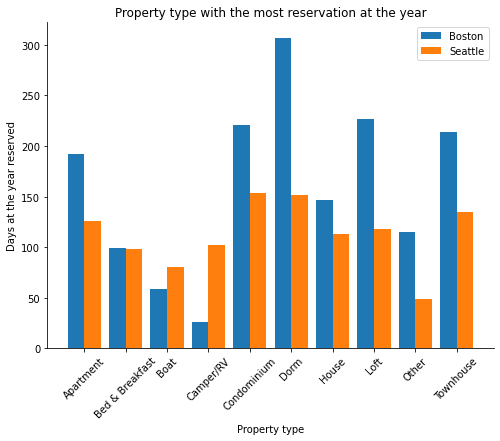

In [15]:
fig, axs = plt.subplots(1,1,figsize = (8,6))
X_axis = np.arange(df_property.shape[0])

plt.bar(X_axis - 0.2,'flg_reserved_day_boston',0.4,data=df_property, label = 'Boston')
plt.bar(X_axis + 0.2,'flg_reserved_day_seattle',0.4,data=df_property, label = 'Seattle')

plt.xticks(X_axis, df_property['property_type'],rotation = 45)
plt.xlabel("Property type")
plt.ylabel("Days at the year reserved")
plt.title("Property type with the most reservation at the year")
plt.legend()
sns.despine()
plt.show()

### Q3: # Are there significant changes between the prices of the cities by type of property?

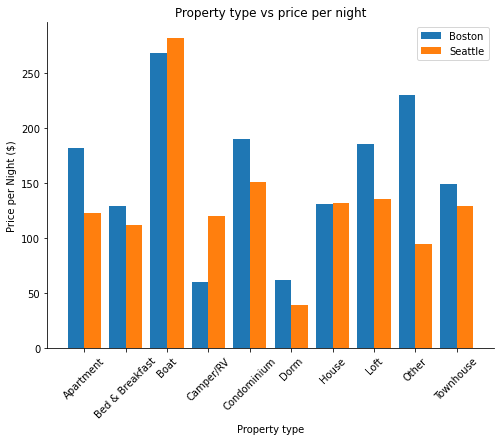

In [20]:
fig, axs = plt.subplots(1,1,figsize = (8,6))
X_axis = np.arange(df_property.shape[0])

plt.bar(X_axis - 0.2,'price_boston',0.4,data=df_property, label = 'Boston')
plt.bar(X_axis + 0.2,'price_seattle',0.4,data=df_property, label = 'Seattle')

plt.xticks(X_axis, df_property['property_type'],rotation = 45)
plt.xlabel("Property type")
plt.ylabel("Price per Night ($)")
plt.title("Property type vs price per night")
plt.legend()
sns.despine()
plt.show()